In [197]:
from ff_analysis_tools import ffcoll_to_df
import pandas as pd

In [198]:
test_sums_df = ffcoll_to_df('ffa_test_3.txt', drop_rare=True)

In [199]:
summaries_df = test_sums_df.astype('int', errors='ignore')

In [200]:
summaries_df = summaries_df.rename(columns={'Summary': 'summary'}) #annoying but necessary

# Comparison code

In [201]:
#compdf = preds_df.compare(summaries_df)
#compdf.iloc[0]
def prediction_error(df1, df2): #place one-hotted tables: truth vs predictions
    compdf = df1.compare(df2)
    single_wrong = 0
    double_wrong = 0
    for x in range(len(compdf)):
        if compdf.iloc[x].sum() == 2:
            double_wrong += 1 #probably the best metric imo, returns no. of 0-err, 1-err, 2-errs
        else:
            single_wrong += 1
    
    return {'0-wrong': len(df2) - len(compdf), '1-wrong': single_wrong, '2-wrong': double_wrong}

In [218]:
fb_preds_df = pd.read_csv('facebook_bart-large-mnli_preds.csv')
td_preds_df = pd.read_csv('typeform_distilbert-base-uncased-mnli_preds.csv')
vh_preds_df = pd.read_csv('valhalla_distilbart-mnli-12-1_preds.csv')
preds_df = pd.read_csv('preds-1-jun-2.csv')
new_preds_df = pd.read_csv('ff_analysis_3.csv')

In [219]:
df_names = {'facebook/bart-large-mnli': fb_preds_df, 'typeform/distilbert-base-uncased-mnli': td_preds_df,\
 'valhalla/distilbart-mnli-12-1': vh_preds_df, 'zdreiosis/ff_analysis_2': preds_df, \
            'zdreiosis/ff_analysis_3': new_preds_df}

for x in df_names:
    print(x + ': ' + str(prediction_error(df_names[x], summaries_df)))

facebook/bart-large-mnli: {'0-wrong': 8, '1-wrong': 66, '2-wrong': 49}
typeform/distilbert-base-uncased-mnli: {'0-wrong': 2, '1-wrong': 91, '2-wrong': 30}
valhalla/distilbart-mnli-12-1: {'0-wrong': 5, '1-wrong': 74, '2-wrong': 44}
zdreiosis/ff_analysis_2: {'0-wrong': 37, '1-wrong': 40, '2-wrong': 46}
zdreiosis/ff_analysis_3: {'0-wrong': 40, '1-wrong': 40, '2-wrong': 43}


In [220]:
reslist = []

for x in df_names:
    k = []
    for y in prediction_error(df_names[x], summaries_df).values():
        k.append(y)
    reslist.append(k)

In [229]:
resdf = pd.DataFrame(reslist, index=[x for x in df_names], columns=['0-wrong', '1-wrong', '2-wrong'])

In [230]:
kresdf = resdf.applymap(lambda x: 100 * (x / (resdf.iloc[1].sum())))

<AxesSubplot:>

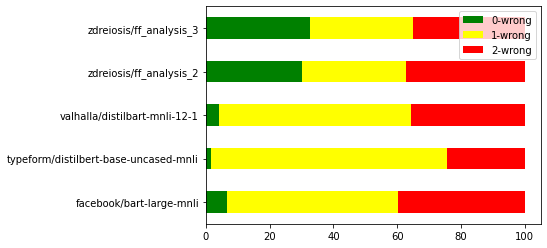

In [234]:
kresdf.plot.barh(stacked=True, color={'0-wrong':'green', '1-wrong':'yellow', '2-wrong':'red'}) 
#the thing is this data isnt very good, coming from only one source. eh.

# Analysis 2

In [328]:
by_new_test_sums_df = ffcoll_to_df('ffdump5.txt', drop_rare=True)

In [329]:
by_new_test_sums_df.tail()

,Summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
1242,Teeth reflects after failing to collect on Spi...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1243,"Instead of Toth hitting Xander, he hits Spike....",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1244,"When Buffy jumped through Glory's portal, she ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1245,Bob the Minions walks into a bar and meets Xan...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1246,A novelisation of episodes from the first thre...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [330]:
N_summaries_df = by_new_test_sums_df.astype('int', errors='ignore')

In [331]:
N_summaries_df = N_summaries_df.rename(columns={'Summary': 'summary'}) #annoying but necessary

In [338]:
N_fb_preds_df = pd.read_csv('14_jun_fb_preds.csv')
N_td_preds_df = pd.read_csv('14_jun_typf_preds.csv')
N_vh_preds_df = pd.read_csv('14_jun_valh_preds.csv')
N_zdr2_preds_df = pd.read_csv('14_jun_zdr2_preds.csv')
N_zdr3_preds_df = pd.read_csv('14_jun_zdr3_preds.csv')
N_zdr4_preds_df = pd.read_csv('14_jun_zdr4_preds.csv')

In [344]:
N_df_names = {'facebook/bart-large-mnli': N_fb_preds_df, 'typeform/distilbert-base-uncased-mnli': N_td_preds_df,\
 'valhalla/distilbart-mnli-12-1': N_vh_preds_df, 'zdreiosis/ff_analysis_2': N_zdr2_preds_df, \
            'zdreiosis/ff_analysis_3': N_zdr3_preds_df, 'zdreiosis/ff_analysis_4': N_zdr4_preds_df}
for x in N_df_names:
    print(x + ': ' + str(prediction_error(N_df_names[x], N_summaries_df)))

facebook/bart-large-mnli: {'0-wrong': 22, '1-wrong': 900, '2-wrong': 325}
typeform/distilbert-base-uncased-mnli: {'0-wrong': 18, '1-wrong': 924, '2-wrong': 305}
valhalla/distilbart-mnli-12-1: {'0-wrong': 11, '1-wrong': 930, '2-wrong': 306}
zdreiosis/ff_analysis_2: {'0-wrong': 740, '1-wrong': 460, '2-wrong': 47}
zdreiosis/ff_analysis_3: {'0-wrong': 740, '1-wrong': 460, '2-wrong': 47}
zdreiosis/ff_analysis_4: {'0-wrong': 740, '1-wrong': 460, '2-wrong': 47}


In [346]:
N_reslist = []

for x in N_df_names:
    k = []
    for y in prediction_error(N_df_names[x], N_summaries_df).values():
        k.append(y)
    N_reslist.append(k)

In [347]:
N_reslist

[[22, 900, 325],
 [18, 924, 305],
 [11, 930, 306],
 [740, 460, 47],
 [740, 460, 47],
 [740, 460, 47]]

<AxesSubplot:>

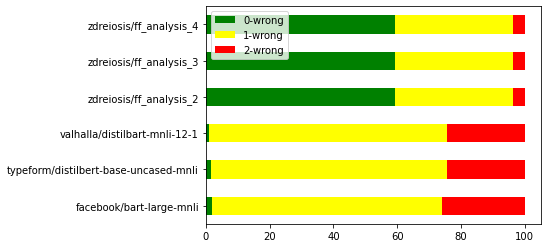

In [348]:
N_resdf = pd.DataFrame(N_reslist, index=[x for x in N_df_names], columns=['0-wrong', '1-wrong', '2-wrong'])
N_kresdf = N_resdf.applymap(lambda x: 100 * (x / (N_resdf.iloc[1].sum())))
N_kresdf.plot.barh(stacked=True, color={'0-wrong':'green', '1-wrong':'yellow', '2-wrong':'red'})

# Analysis 3

In [379]:
by_new_test_sums_df = ffcoll_to_df('ffdump6.txt', drop_rare=True)
by_new_test_sums_df.head()

,Summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
0,Sasuke learns why the toilet brush is kept in ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,A collection of Valentine's Day oneshots from ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Konoha's sewers are a funny place. You can fin...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,If there was any chance of forgetting this gir...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,wherein Sakura clues Naruto in to the fact som...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [384]:
by_new_test_sums_df.iloc[4]

Summary         wherein Sakura clues Naruto in to the fact som...
Adventure                                                     0.0
Angst                                                         0.0
Drama                                                         0.0
Family                                                        1.0
Friendship                                                    0.0
Humor                                                         1.0
Hurt_Comfort                                                  0.0
Romance                                                       0.0
Name: 4, dtype: object

In [357]:
N_summaries_df = by_new_test_sums_df.astype('int', errors='ignore')
N_summaries_df = N_summaries_df.rename(columns={'Summary': 'summary'})

In [381]:
N_fb_preds_df = pd.read_csv('15_jun_fb_preds.csv')
N_td_preds_df = pd.read_csv('15_jun_typf_preds.csv')
N_vh_preds_df = pd.read_csv('15_jun_valh_preds.csv')
N_zdr2_preds_df = pd.read_csv('15_jun_zdr2_preds.csv')
N_zdr3_preds_df = pd.read_csv('15_jun_zdr3_preds.csv')
N_zdr4_preds_df = pd.read_csv('15_jun_zdr4_preds.csv')

In [354]:
N_df_names = {'facebook/bart-large-mnli': N_fb_preds_df, 'typeform/distilbert-base-uncased-mnli': N_td_preds_df,\
 'valhalla/distilbart-mnli-12-1': N_vh_preds_df, 'zdreiosis/ff_analysis_2': N_zdr2_preds_df, \
            'zdreiosis/ff_analysis_3': N_zdr3_preds_df, 'zdreiosis/ff_analysis_4': N_zdr4_preds_df}
for x in N_df_names:
    print(x + ': ' + str(prediction_error(N_df_names[x], N_summaries_df)))

facebook/bart-large-mnli: {'0-wrong': 0, '1-wrong': 188, '2-wrong': 63}
typeform/distilbert-base-uncased-mnli: {'0-wrong': 2, '1-wrong': 190, '2-wrong': 59}
valhalla/distilbart-mnli-12-1: {'0-wrong': 1, '1-wrong': 193, '2-wrong': 57}
zdreiosis/ff_analysis_2: {'0-wrong': 7, '1-wrong': 166, '2-wrong': 78}
zdreiosis/ff_analysis_3: {'0-wrong': 7, '1-wrong': 166, '2-wrong': 78}
zdreiosis/ff_analysis_4: {'0-wrong': 7, '1-wrong': 166, '2-wrong': 78}


In [355]:
N_reslist = []

for x in N_df_names:
    k = []
    for y in prediction_error(N_df_names[x], N_summaries_df).values():
        k.append(y)
    N_reslist.append(k)

<AxesSubplot:>

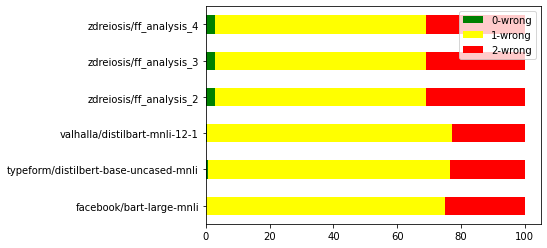

In [356]:
N_resdf = pd.DataFrame(N_reslist, index=[x for x in N_df_names], columns=['0-wrong', '1-wrong', '2-wrong'])
N_kresdf = N_resdf.applymap(lambda x: 100 * (x / (N_resdf.iloc[1].sum())))
N_kresdf.plot.barh(stacked=True, color={'0-wrong':'green', '1-wrong':'yellow', '2-wrong':'red'})

# Analysis 4

In [422]:
txt_src = 'ffdump7.txt'
csv_model_name_dict = {
    '15_jun_2_fb_preds.csv': 'facebook/bart-large-mnli',
    '15_jun_2_typf_preds.csv': 'typeform/distilbert-base-uncased-mnli',
    '15_jun_2_valh_preds.csv': 'valhalla/distilbart-mnli-12-1',
    '15_jun_2_zdr2_preds.csv': 'zdreiosis/ff_analysis_2',
    '15_jun_2_zdr3_preds.csv': 'zdreiosis/ff_analysis_3',
    '15_jun_2_zdr4_preds.csv': 'zdreiosis/ff_analysis_4',
    'PREDS_zdr5_ffdump7_2.csv': 'zdr5-test',
}

def accuracy_statistics(txt_src, csv_model_name_dict):
    by_new_test_sums_df = ffcoll_to_df(txt_src, drop_rare=True)
    
    N_summaries_df = by_new_test_sums_df.astype('int', errors='ignore')
    N_summaries_df = N_summaries_df.rename(columns={'Summary': 'summary'})
    
    N_df_names = {}
    for x in csv_model_name_dict:
        N_df_names[csv_model_name_dict[x]] = pd.read_csv(x)
        
    for x in N_df_names:
        print(x + ': ' + str(prediction_error(N_df_names[x], N_summaries_df)))
        
    N_reslist = []

    for x in N_df_names:
        k = []
        for y in prediction_error(N_df_names[x], N_summaries_df).values():
            k.append(y)
        N_reslist.append(k)
    
    N_resdf = pd.DataFrame(N_reslist, index=[x for x in N_df_names], columns=['0-wrong', '1-wrong', '2-wrong'])
    N_kresdf = N_resdf.applymap(lambda x: 100 * (x / (N_resdf.iloc[1].sum())))
    N_kresdf.plot.barh(stacked=True, color={'0-wrong':'green', '1-wrong':'yellow', '2-wrong':'red'})

In [423]:
accuracy_statistics(txt_src, csv_model_name_dict)

facebook/bart-large-mnli: {'0-wrong': 3, '1-wrong': 160, '2-wrong': 59}
typeform/distilbert-base-uncased-mnli: {'0-wrong': 4, '1-wrong': 176, '2-wrong': 42}
valhalla/distilbart-mnli-12-1: {'0-wrong': 3, '1-wrong': 167, '2-wrong': 52}
zdreiosis/ff_analysis_2: {'0-wrong': 21, '1-wrong': 109, '2-wrong': 92}
zdreiosis/ff_analysis_3: {'0-wrong': 21, '1-wrong': 109, '2-wrong': 92}
zdreiosis/ff_analysis_4: {'0-wrong': 21, '1-wrong': 109, '2-wrong': 92}
zdr5-test: {'0-wrong': 21, '1-wrong': 112, '2-wrong': 89}


ValueError: Can only compare identically-labeled DataFrame objects

In [426]:
txt_src = 'ff_dump_final.txt'
csv_model_name_dict = {
    'PREDS_zdr5_1_tdfs_list.csv': 'zdr5-train',
    'PREDS_zdr5_1_tdfs_list.csv': 'zdr5-train-dummy'
}

def accuracy_statistics(txt_src, csv_model_name_dict):
    by_new_test_sums_df = ffcoll_to_df(txt_src, drop_rare=True)
    
    N_summaries_df = by_new_test_sums_df.astype('int', errors='ignore')
    N_summaries_df = N_summaries_df.rename(columns={'Summary': 'summary'})
    
    N_df_names = {}
    for x in csv_model_name_dict:
        N_df_names[csv_model_name_dict[x]] = pd.read_csv(x)
    
    
    for x in N_df_names:
        print(x + ': ' + str(prediction_error(N_df_names[x], N_summaries_df)))
        
    N_reslist = []

    for x in N_df_names:
        k = []
        for y in prediction_error(N_df_names[x], N_summaries_df).values():
            k.append(y)
        N_reslist.append(k)
    
    N_resdf = pd.DataFrame(N_reslist, index=[x for x in N_df_names], columns=['0-wrong', '1-wrong', '2-wrong'])
    N_kresdf = N_resdf.applymap(lambda x: 100 * (x / (N_resdf.iloc[1].sum())))
    N_kresdf.plot.barh(stacked=True, color={'0-wrong':'green', '1-wrong':'yellow', '2-wrong':'red'})

In [428]:
dftraink1 = pd.read_csv('15_jun_2_zdr4_preds.csv')

In [429]:
dftraink1.tail()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
217,Forced to be sociable by his so called friends...,0,0,0,0,0,0,1,1
218,Sequel to Tears of Rain: [SADLY DISCONTINUED],0,1,0,1,0,0,0,0
219,"Natsu and Erza had never met in their lives, b...",0,0,0,0,1,0,0,1
220,Everything has its own consequences. Lucy's de...,0,0,0,0,1,0,0,1
221,(Follow-up to my previous MidLu Halloween stor...,0,0,0,0,1,0,1,0
